In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
name = 'BD_data.xlsx'

In [34]:
row_data = pd.read_excel(name, usecols = [1], skiprows= 1, names = ['reg'])
print(row_data.head())
row_data.describe()

                                       reg
0   пациент 21 оплатил 3468.72 от 7.1.2020
1   пациент 22 оплатил 9264.84 от 2.1.2020
2  пациент 23 оплатил 9593.12 от 31.1.2020
3  пациент 24 оплатил 7798.25 от 30.1.2020
4  пациент 25 оплатил 4425.30 от 24.1.2020


,reg
count,660
unique,660
top,пациент 21 оплатил 3468.72 от 7.1.2020
freq,1


In [35]:
# После загрузки данных построчно разделил данные по пробелам
row_ser = row_data.reg.apply(lambda x: x.split())
row_ser.head()

0     [пациент, 21, оплатил, 3468.72, от, 7.1.2020]
1     [пациент, 22, оплатил, 9264.84, от, 2.1.2020]
2    [пациент, 23, оплатил, 9593.12, от, 31.1.2020]
3    [пациент, 24, оплатил, 7798.25, от, 30.1.2020]
4    [пациент, 25, оплатил, 4425.30, от, 24.1.2020]
Name: reg, dtype: object

In [36]:
data = pd.DataFrame(list(row_ser), dtype = str)
data.head()

,0,1,2,3,4,5
0,пациент,21,оплатил,3468.72,от,7.1.2020
1,пациент,22,оплатил,9264.84,от,2.1.2020
2,пациент,23,оплатил,9593.12,от,31.1.2020
3,пациент,24,оплатил,7798.25,от,30.1.2020
4,пациент,25,оплатил,4425.30,от,24.1.2020


In [37]:
# Атрибуты данных, имеющие одни и те же значения в каждой строке не несут в 
# себе информационной ценности, поэтому стоит проверить колонки на уникальность
# и удалить ненужные атрибуты
for i in data.columns: 
    if len(data[i].unique()) == 1:
        data.drop(columns = i, inplace = True)
print(data.head())
# Поскольку ожидалось, что в 4ом столбце будут одинаковые значения, но столбец
# не был удален, стоит посмотреть на его уникальность
# В 4ом столбце оказались значения дат, поскольку в некоторых строках была 
# допущена ошибка в записи (пропущено разделительное слово 'от') 
data[4].unique()

    1        3   4          5
0  21  3468.72  от   7.1.2020
1  22  9264.84  от   2.1.2020
2  23  9593.12  от  31.1.2020
3  24  7798.25  от  30.1.2020
4  25  4425.30  от  24.1.2020


array(['от', '13.9.2020', '15.2.2020', '14.3.2020', '13.4.2020',
       '28.4.2020'], dtype=object)

In [38]:
# Записал ошибочые данные в массив
error_list = data[4].unique()[1:]
error_list

array(['13.9.2020', '15.2.2020', '14.3.2020', '13.4.2020', '28.4.2020'],
      dtype=object)

In [39]:
# Дополнил столбец с датами пропущенными данными в местах ошибки
# Проверил данные на наличие пропусков
# Выбросил 4ый столбец
for i in error_list:
    data[5].loc[data[4] == i] = i
data.info()
data.drop(columns = 4, inplace = True)
# Переименовал аттрибуты для удобства
data.rename(columns = {1: 'id', 3: 'paid', 5: 'date'}, inplace = True)
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       660 non-null    object
 1   3       660 non-null    object
 2   4       660 non-null    object
 3   5       660 non-null    object
dtypes: object(4)
memory usage: 20.8+ KB


,id,paid,date
0,21,3468.72,7.1.2020
1,22,9264.84,2.1.2020
2,23,9593.12,31.1.2020
3,24,7798.25,30.1.2020
4,25,4425.30,24.1.2020
5,26,4019.86,10.26.2020
6,27,6508.98,11.9.2020
7,28,4447.99,1.29.2020
8,29,4111.23,22.1.2020
9,30,7877.01,26.2.2020


In [43]:
# Сформировал новый столбец с первичными значениями месяца с учетомсбоя в 
# сохранении дат
data['month'] = data['date'].apply(lambda x: x.split('.')[1] if int(x.split('.')[1]) < 13 else x.split('.')[0])
data.head(10)

,id,paid,date,month
0,21,3468.72,7.1.2020,1
1,22,9264.84,2.1.2020,1
2,23,9593.12,31.1.2020,1
3,24,7798.25,30.1.2020,1
4,25,4425.30,24.1.2020,1
5,26,4019.86,10.26.2020,10
6,27,6508.98,11.9.2020,9
7,28,4447.99,1.29.2020,1
8,29,4111.23,22.1.2020,1
9,30,7877.01,26.2.2020,2


In [44]:
# Изменил типизацию числовых данных
data = data.astype({'id': int, 'paid': float, 'month': int})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      660 non-null    int32  
 1   paid    660 non-null    float64
 2   date    660 non-null    object 
 3   month   660 non-null    int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 15.6+ KB


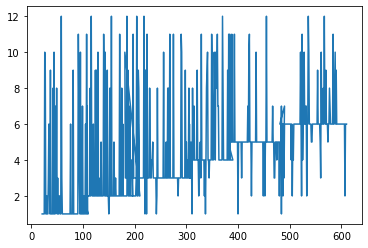

In [53]:
plt.plot(data['id'], data['month'])
plt.show()

In [61]:
# Решил сгруппировать данные по значениям месяцев, потому что думал, что в сбое
# дат есть видимая последовательность
dt = data.groupby('month').paid.sum()
dt.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

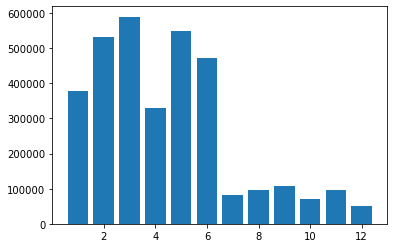

In [67]:
plt.bar(dt.index, dt.values)
plt.show()

In [12]:
# Загрузил данные месячного отчета, проверил типизацию данных
report = pd.read_excel(name, usecols = [5,6], skiprows= 1, nrows = 6, names = ['Month', 'Total'])
print(report)
report.info()

     Month      Total
0   январь  485487.84
1  февраль  570192.91
2     март  698723.40
3   апрель  444834.87
4      май  574488.89
5     июнь  579810.45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   6 non-null      object 
 1   Total   6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


In [13]:
# Предположил, что в исходной таблице данные расположены с сортировкой по 
# по реальным месяцам оплаты
# Посчитал кумулятивную сумму, чтоб проверить, есть ли совпадение с месячным
# отчетом за январь
data_fixed = data.copy()
data_fixed['cumsum'] = data_fixed['paid'].cumsum()
any(data_fixed['cumsum'] == report.Total[0])


True

In [14]:
# Определил номера столбцов, где кумулятивная сумма становится равной месячному
# отчету для шести месяцев
# Изменил значения столбца 'month' в соответствии с месячным отчетом
k = [-1]
for i in report.index:
    data_fixed.loc[k[-1]+1:, 'cumsum'] = data_fixed.loc[k[-1]+1:,'paid'].cumsum().round(2)
    sum_ind = data_fixed[data_fixed['cumsum'] == report.Total[i]].index[0]
    k.append(sum_ind)
    data_fixed.loc[k[-2]+1:k[-1], 'month'] = i+1


In [15]:
# Сгруппировал данные по месяцам для проверки соответствия месячному отчету
data_fixed.groupby('month').paid.sum()

month
1    485487.84
2    570192.91
3    698723.40
4    444834.87
5    574488.89
6    579810.45
Name: paid, dtype: float64

In [16]:
# Переформировал и переименовал данные для формирования окончатеьлной таблицы
# Создал CSV документ
final_data = data_fixed[['id', 'month', 'paid']].rename(columns =  {'id': 'patient_id', 'month': 'report_month', 'paid': 'loss'})
final_data.to_csv('Кайсаров_Илья.csv', index = False)